In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Transformed Image')

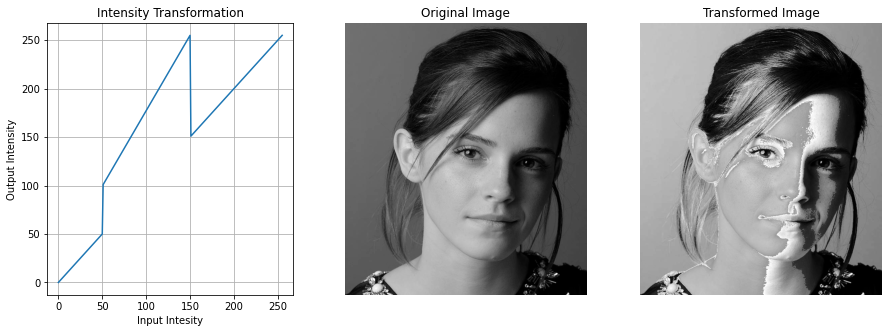

In [17]:
emma_img_gray = cv.imread(r"Images\emma_gray.jpg", cv.IMREAD_GRAYSCALE)

section_1 = np.linspace(0, 50, 51)
section_2 = np.linspace(101, 255, 100)
section_3 = np.linspace(151, 255, 105)

intensity_transform = np.concatenate((section_1, section_2, section_3), axis=0)

emma_img_gray_transformed = cv.LUT(emma_img_gray, intensity_transform)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(intensity_transform)
ax[0].set_xlabel("Input Intesity")
ax[0].set_ylabel("Output Intensity")
ax[0].set_title("Intensity Transformation")
ax[0].grid()

ax[1].imshow(emma_img_gray, cmap = "gray")
ax[1].axis("off")
ax[1].set_title("Original Image")

ax[2].imshow(emma_img_gray_transformed, cmap = "gray")
ax[2].axis('off')
ax[2].set_title("Transformed Image")


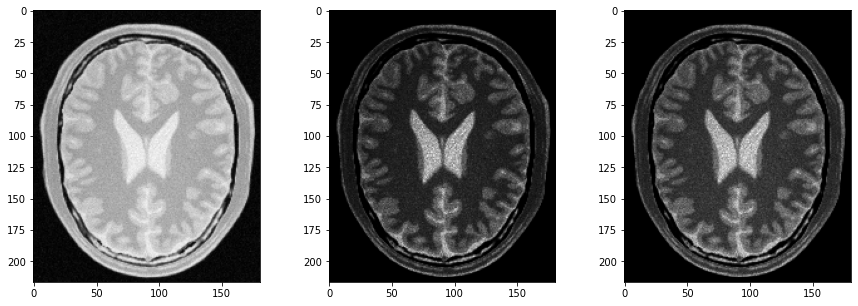

In [51]:
brain_img = cv.imread(r"Images\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

gamma_white = 5
gamma_gray = 4

gamma_correction_white_matter = np.array([ (i/255.0)**gamma_white * 255.0 for i in range(0, 256) ]).astype(np.uint8)
gamma_correction_gray_matter = np.array([ (i/255.0)**gamma_gray * 255.0 for i in range(0, 256) ]).astype(np.uint8)

#gamma_correction_white_matter[ gamma_correction_white_matter < 51] = 0

brain_img_white_matter = cv.LUT(brain_img, gamma_correction_white_matter)
brain_img_gray_matter = cv.LUT(brain_img, gamma_correction_gray_matter)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(brain_img, cmap = "gray", vmax = 255, vmin = 0)
ax[1].imshow(brain_img_white_matter, cmap = "gray")
ax[2].imshow(brain_img_gray_matter, cmap = "gray")